In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

def plot_grids(scale1=1.0, scale2=1.0):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.cla()  # Clear the current figure
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')

    # First grid (blue solid lines)
    x1 = np.arange(-10, 10 + scale1, scale1)
    y1 = np.arange(-10, 10 + scale1, scale1)
    for x in x1:
        ax.axvline(x, color='blue', linestyle='-', alpha=0.5)
    for y in y1:
        ax.axhline(y, color='blue', linestyle='-', alpha=0.5)

    # Second grid (red dashed lines)
    x2 = np.arange(-10, 10 + scale2, scale2)
    y2 = np.arange(-10, 10 + scale2, scale2)
    for x in x2:
        ax.axvline(x, color='red', linestyle='--', alpha=0.5)
    for y in y2:
        ax.axhline(y, color='red', linestyle='--', alpha=0.5)

    # Origin point
    ax.plot(0, 0, 'ko')  # Black dot at (0,0)

    # Add scale annotations
    ax.text(0.05, 0.95, f'Scale1: {scale1}', transform=ax.transAxes, color='blue', fontsize=12, verticalalignment='top')
    ax.text(0.05, 0.90, f'Scale2: {scale2}', transform=ax.transAxes, color='red', fontsize=12, verticalalignment='top')

    ax.grid(False)
    plt.show()

# Interactive sliders for scaling
interact(plot_grids,
         scale1=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 1'),
         scale2=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 2'))

interactive(children=(FloatSlider(value=1.0, description='Scale 1', max=5.0, min=0.1), FloatSlider(value=1.0, …

<function __main__.plot_grids(scale1=1.0, scale2=1.0)>

In [11]:
from input import *
lambdas = [0.8]  # Wavelengths
betas = [1]  # Scaling factor for bandwidth
thetas = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Orientations
psis = [0, np.pi]  # Phase offsets
gammas = [0.5]  # Aspect ratio
size = 6  # Gabor filter sizes
gabor_filters = GaborFilters(size, lambdas, betas, thetas, psis, gammas)


In [30]:
import PIL
from scipy.signal import convolve2d
filter = gabor_filters.filters[0]
print(type(filter))
image_path = "data/3N2P/tc_lc_rc.jpg"
image = PIL.Image.open(image_path).convert('L')
image = np.array(image) / 255.0
print(type(image))
convolved_image = np.zeros((image.shape[0], image.shape[1]))
convolved_image = convolve2d(
    image, filter.filter_array, mode="same", boundary="wrap",
)



<class 'input.gabor_filters.GaborFilter'>
<class 'numpy.ndarray'>


-0.005592780933785161


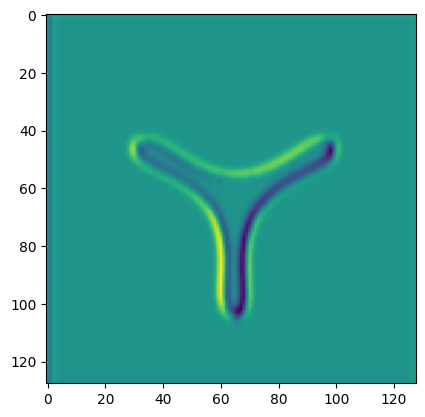

In [38]:
imshow(convolved_image)
print(np.mean(convolved_image[64,:]))

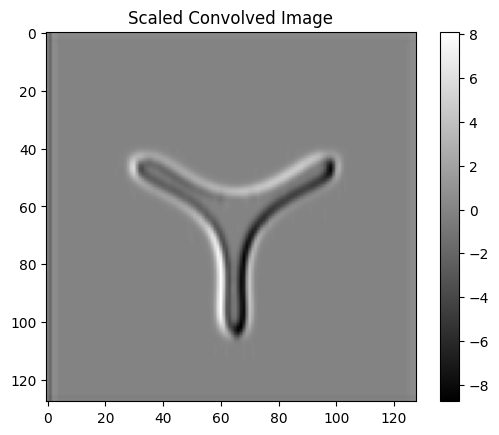

In [39]:
# Calculate the Euclidean mean of the convolved image
euclidean_mean = np.sqrt(np.mean(convolved_image**2))

# Scale the convolved image by its Euclidean mean
scaled_convolved_image = convolved_image / euclidean_mean

# Display the scaled convolved image
plt.imshow(scaled_convolved_image, cmap='gray')
plt.title('Scaled Convolved Image')
plt.colorbar()
plt.show()

In [40]:
print(np.mean(scaled_convolved_image[64,:]))

-0.12853259908084708


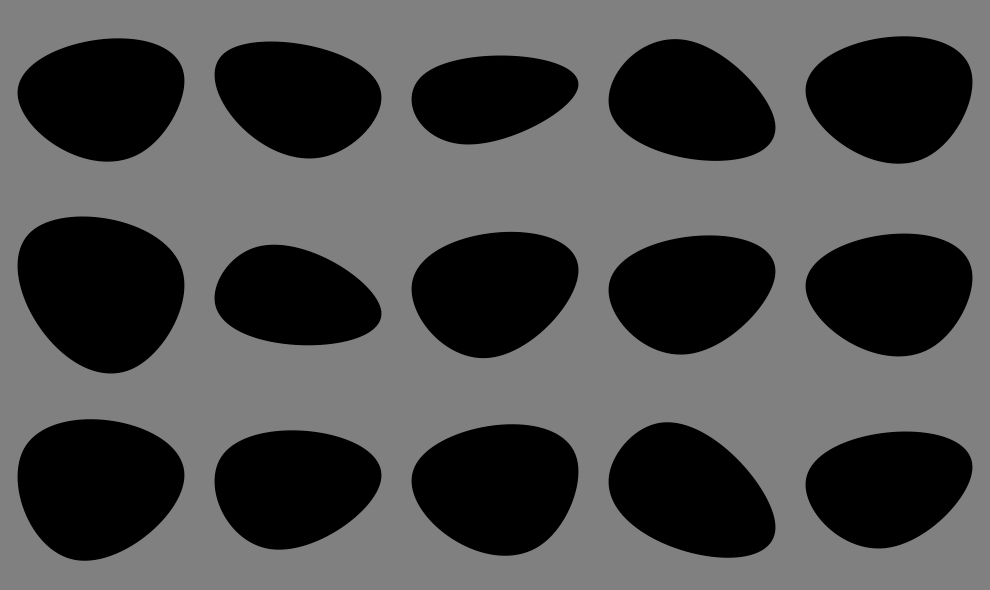

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def generate_smooth_shape(num_vertices, contour_type, size=1):
    """
    Generate a smooth convex or concave shape.
    
    Parameters:
        num_vertices (int): Number of key vertices for the shape.
        contour_type (str): 'convex' or 'concave'.
        size (float): Base size of the shape.
        
    Returns:
        x, y (arrays): Coordinates of the smooth shape.
    """
    # Generate key vertices in polar coordinates
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    
    if contour_type == "convex":
        radii = np.ones(num_vertices) * size + np.random.uniform(-0.1, 0.1, num_vertices)
    elif contour_type == "concave":
        radii = np.ones(num_vertices) * size + np.random.uniform(-0.4, 0.2, num_vertices)
    else:
        raise ValueError("Unknown contour type. Choose 'convex' or 'concave'.")
    
    # Convert polar to Cartesian coordinates
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    
    # Close the shape by repeating the first vertex
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    
    # Use splines to smooth the shape
    tck, u = splprep([x, y], s=0.5, per=True)
    u_fine = np.linspace(0, 1, 100)
    x_smooth, y_smooth = splev(u_fine, tck)
    
    return x_smooth, y_smooth

def plot_shapes_grid(rows, cols, save_path="smooth_shapes_grid.png"):
    """
    Plot a grid of smooth shapes with varied sides and contour types.
    """
    fig, ax = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    contour_types = ["convex", "concave"]
    num_vertices_list = [5, 6, 7, 8]  # Number of vertices (e.g., pentagon, hexagon)

    # Create a gray background
    fig.patch.set_facecolor('gray')
    for i in range(rows):
        for j in range(cols):
            # Randomly pick number of vertices and contour type
            num_vertices = np.random.choice(num_vertices_list)
            contour_type = np.random.choice(contour_types)
            
            # Generate smooth shape
            x, y = generate_smooth_shape(num_vertices, contour_type, size=1)
            
            # Plot the shape
            ax[i, j].fill(x, y, color="black")
            ax[i, j].axis("equal")
            ax[i, j].axis("off")
            ax[i, j].set_facecolor("gray")

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, facecolor=fig.get_facecolor())
    plt.show()

# Generate and save a grid of smooth shapes
plot_shapes_grid(rows=3, cols=5)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

def plot_grids(scale1=1.0, scale2=1.0):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.cla()  # Clear the current figure
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')

    # First grid (blue solid lines)
    limit = 10
    # Generate grid lines that pass through the origin and extend beyond it
    num_lines1 = int(np.ceil(limit / scale1))
    x1 = np.arange(-num_lines1 * scale1, (num_lines1 + 1) * scale1, scale1)
    y1 = x1  # Since it's symmetric
    for x in x1:
        ax.axvline(x, color='blue', linestyle='-', alpha=0.5)
    for y in y1:
        ax.axhline(y, color='blue', linestyle='-', alpha=0.5)

    # Second grid (red dashed lines)
    num_lines2 = int(np.ceil(limit / scale2))
    x2 = np.arange(-num_lines2 * scale2, (num_lines2 + 1) * scale2, scale2)
    y2 = x2
    for x in x2:
        ax.axvline(x, color='red', linestyle='--', alpha=0.5)
    for y in y2:
        ax.axhline(y, color='red', linestyle='--', alpha=0.5)

    # Origin point
    ax.plot(0, 0, 'ko')  # Black dot at (0,0)

    # Add scale annotations
    ax.text(0.05, 0.95, f'Scale1: {scale1}', transform=ax.transAxes, color='blue', fontsize=12, verticalalignment='top')
    ax.text(0.05, 0.90, f'Scale2: {scale2}', transform=ax.transAxes, color='red', fontsize=12, verticalalignment='top')

    ax.grid(False)
    plt.show()

# Interactive sliders for scaling
interact(plot_grids,
         scale1=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 1'),
         scale2=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Scale 2'))

interactive(children=(FloatSlider(value=1.0, description='Scale 1', max=5.0, min=0.1), FloatSlider(value=1.0, …

<function __main__.plot_grids(scale1=1.0, scale2=1.0)>

In [7]:
# this is the main module. I will use this to gate running scripts as I develop. My aim is to develop clear well documented readable code.

from brian2 import *
from network import *
from input import *
from run import *
from tensorflow.keras.datasets import mnist

def input_example(num_inputs):
    # Exemplifies how to use the filter module
    import numpy as np

    lambdas = [2]  # Wavelengths
    betas = [1.5]  # Scaling factor for bandwidth
    thetas = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Orientations
    psis = [0, np.pi]  # Phase offsets
    gammas = [0.5]  # Aspect ratio
    size = 128
    gabor_filters = GaborFilters(size, lambdas, betas, thetas, psis, gammas)

    # Load the MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # Extract the first 30 images
    num_images = num_inputs
    dataset = train_images[:num_images]

    # Normalize the dataset
    dataset = dataset.astype(np.float32) / 255.0
    neuron_inputs = generate_inputs_from_filters(
        dataset,
        gabor_filters,
        neuron_size=14,
        image_size=28,
        num_total_pixels=30,
        radius=8,
        shape="circle",
    )
    return neuron_inputs

def three_dim_visualise_synapses(synapses: Synapses):
    Ns = len(synapses.source)
    num_pre_neurons = len(synapses.N_incoming_pre)
    len_pre = int(sqrt(num_pre_neurons))
    Nt = len(synapses.target)
    num_post_neurons = len(synapses.N_incoming_post)
    len_post = int(sqrt(num_post_neurons))
    s_i_column = synapses.i % len_pre
    s_i_row = synapses.i // len_pre
    s_j_column = synapses.j % len_post
    s_j_row = synapses.j // len_post
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(
        s_i_column, s_i_row, 0, c="blue", label="Pre-synaptic neurons", s=100
    )  # Blue circles
    ax.scatter(
        s_j_column, s_j_row, 1, c="red", label="Post-synaptic neurons", s=100
    )  # Red circles
    for x1, y1, x2, y2 in zip(x_pre, y_pre, x_post, y_post):
        ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.6)  # Black lines with transparency

    for x1, y1, x2, y2 in zip(x_pre, y_pre, x_post, y_post):
        ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.6)  # Black lines with transparency

    plt.show()


network = Network()
on_plasticity = True

def toggle_plasticity(state):
    if not isinstance(state, bool):
        raise ValueError("State must be a boolean")
    global on_plasticity
    on_plasticity = state

n_layers = 2  # Number of layers to create
stimulus_length = 500 * ms
num_inputs = 30
# Currently length is stores as a parameter in the NeuronSpecs class
# This is less than optimal, but it works for now

# Define neuron specifications for excitatory neurons
exc_neuron_specs = NeuronSpecs(
    neuron_type="excitatory",
    length=14,
    cm=500 * pF,
    g_leak=25 * nS,
    v_threshold=-53 * mV,
    v_reset=-57 * mV,
    v_rest=-74 * mV,
    v_reversal_e=0 * mV,
    v_reversal_i=-70 * mV,
    sigma=0.015 * mV,
    t_refract=2 * ms,  # NEED TO ADD THIS
    tau_m=20 * ms,
    tau_ee=2 * ms,
    tau_ie=5 * ms,
)

# Define neuron specifications for inhibitory neurons
inh_neuron_specs = NeuronSpecs(
    neuron_type="inhibitory",
    length=7,
    cm=214 * pF,
    g_leak=18 * nS,
    v_threshold=-53 * mV,
    v_reset=-58 * mV,
    v_rest=-82 * mV,
    v_reversal_e=0 * mV,
    v_reversal_i=-70 * mV,
    sigma=0.015 * mV,
    tau_m=12 * ms,
    tau_ei=2 * ms,
    tau_ii=5 * ms,
)

# Define STDP synapse specifications
stdp_synapse_specs = StdpSynapseSpecs(
    lambda_e=0.1 * nS,
    A_minus=0.1,
    A_plus=0.1,
    alpha_C=0.5,
    alpha_D=0.5,
    tau_c=3 * ms,
    tau_d=5 * ms,
)

# Define non-STDP synapse specifications
non_stdp_synapse_specs = NonStdpSynapseSpecs(
    lambda_e=0.1 * nS,
    lambda_i=0.1 * nS,
)

input_lambda_e = 10 * nS

# Create Synapses
create_neuron_groups(network, n_layers, exc_neuron_specs, inh_neuron_specs)
# Create Synapses
create_synapse_groups(
    network,
    n_layers,
    exc_neuron_specs,
    inh_neuron_specs,
    stdp_synapse_specs,
    non_stdp_synapse_specs,
)
# Sort inputs
print("Generating inputs")
# Got to make sure this is defined globally - can it be added to the network/included globally

neuron_inputs = input_example(num_inputs)

neuron_inputs.visualise()

timed_input = generate_timed_input_from_input(neuron_inputs, stimulus_length)
epoch_length = stimulus_length * num_inputs
input_synapses = wire_input_layer(
    network,
    exc_neuron_specs,
    timed_input,
    epoch_length=epoch_length,
)

print(
    r"""

**********************************************************************
*                                                                    *
*   █████   ██    ██  ███    ██  ███    ██ █████ ███    ██  ██████   *
*   ██   ██ ██    ██  ████   ██  ████   ██  ██   ████   ██ ██        *
*   █████   ██    ██  ██ ██  ██  ██ ██  ██  ██   ██ ██  ██ ██    ██  *
*   ██   ██ ██    ██  ██  ██ ██  ██  ██ ██  ██   ██  ██ ██ ██     █  *
*   ██   ██  ██████   ██   ████  ██   ████ █████ ██   ████   █████   *
*                                                                    *
*                                                                    *
*   ██      ██ ███████ ██████ ██     ██   █████  █████    ██    ██   *
*   ████   ██ ██         ██   ██     ██  ██   ██ ██   ██  ██  ██     *
*   ██ ██  ██ █████      ██   ██  █  ██  ██   ██ █████    ████       *
*   ██  ██ ██ ██         ██   ██ ███ ██  ██   ██ ██   ██  ██  ██     *
*   ██   ████ ███████    ██    ███ ███    █████  ██   ██  ██    ██   *
*                                                                    *
*             ✨   BROUGHT TO YOU BY OCTNAI    ✨                     *
**********************************************************************
"""
)
# SETUP MONITORS:

monitors = Monitors(network, n_layers)
# monitors.setup_monitors([1], "voltage")  # Cant monitor voltage of input layer
monitors.setup_excitatory_monitors([1], "spike")
monitors.toggle_monitoring(
    [2], "spike", enable=False
)  # GONNA NEED TO SORT THAT TOO!
namespace = {
    "input_lambda_e": input_lambda_e,
    "timed_input": timed_input,
    "epoch_length": epoch_length,
}
# TRAIN NETWORK:

run_training(network, namespace, stimulus_length, num_inputs, no_epochs=1)
# TEST NETWORK:
run_testing_epoch(monitors, network, namespace, stimulus_length, num_inputs)
print("analysing data")
monitors.animate_spike_heatmap(
    1, "spike", num_inputs, stimulus_length, exc_neuron_specs.length
)



WARNING    /Users/jreid/Dropbox/dphil/programming/spikes/spikes/network/neurons.py:151: UserWarning: Missing required parameters: v_reversal_a
  warnings.warn(f"Missing required parameters: {', '.join(missing_params)}")
 [py.warnings]


ValueError: Invalid neuron_type: excitatory. Must be 'e' or 'i'.

In [ ]:
%matplotlib ipympl
synapses = stdp_synapse_specs.synapse_objects["excitatory_excitatory_1"]

#matplotlib.use('Qt5Agg')  # Or 'TkAgg' if Qt5Agg is unavailablesynapses = stdp_synapse_specs.synapse_objects["excitatory_excitatory_1"]
def three_dim_visualise_synapses(synapses: Synapses):
    Ns = len(synapses.source)
    num_pre_neurons = len(synapses.N_outgoing_pre)
    len_pre = int(sqrt(num_pre_neurons))
    Nt = len(synapses.target)
    num_post_neurons = len(synapses.N_incoming_post)
    len_post = int(sqrt(num_post_neurons))
    s_i_column = synapses.i % len_pre
    s_i_row = synapses.i // len_pre
    s_j_column = synapses.j % len_post
    s_j_row = synapses.j // len_post
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(
        s_i_column, s_i_row, 0, c="blue", label="Pre-synaptic neurons", s=100
    )  # Blue circles
    ax.scatter(
        s_j_column, s_j_row, 1, c="red", label="Post-synaptic neurons", s=100
    )  # Red circles
    for x1, y1, x2, y2 in zip(s_i_column, s_i_row, s_j_column, s_j_row):
        if (x1,y1) == (len_pre//4, len_pre//4):
            ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.9,color="gold" )  # gold lines with transparency
        elif (x2,y2) == (3* len_pre//4, 3 *len_pre//4):
            ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.9,color="green" )
        else:
            ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.1)
    # for x1, y1, x2, y2 in zip(s_i_column, s_i_row, s_j_column, s_j_row):
    #     ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.3)  # Black lines with transparency

    plt.show(
    )

three_dim_visualise_synapses(synapses)

def three_dim_visualise_synapses(synapses: Synapses):
    Ns = len(synapses.source)
    num_pre_neurons = len(synapses.N_outgoing_pre)
    len_pre = int(sqrt(num_pre_neurons))
    Nt = len(synapses.target)
    num_post_neurons = len(synapses.N_incoming_post)
    len_post = int(sqrt(num_post_neurons))
    s_i_column = synapses.i % len_pre
    s_i_row = synapses.i // len_pre
    s_j_column = synapses.j % len_post
    s_j_row = synapses.j // len_post
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(
        s_i_column, s_i_row, 0, c="blue", label="Pre-synaptic neurons", s=100
    )  # Blue circles
    ax.scatter(
        s_j_column, s_j_row, 1, c="red", label="Post-synaptic neurons", s=100
    )  # Red circles
    for x1, y1, x2, y2 in zip(s_i_column, s_i_row, s_j_column, s_j_row):
        ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.1)
    # for x1, y1, x2, y2 in zip(s_i_column, s_i_row, s_j_column, s_j_row):
    #     ax.plot([x1, x2], [y1, y2], [0, 1], "-k", alpha=0.3)  # Black lines with transparency

    plt.show(
    )
    

In Python I would like to generate the complete set of images which appear like the attached image. They are images with three sides where each side is either concave or convex. There are therefore 8 (2^3) possible shapes and 6 distinct boundary contour elements (2x3) (in terms of orientation and contour). I would like to generate the full set of images with each edge equally spaced in a triangle, so that one is directly below and the two above are equally high at an angle of 120 degrees from one another. For now, generate those shapes then display them as subplots within one graph

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_triangle_shape(ax, configuration, radius=1):
    """
    Draws a triangle with concave/convex edges on a given axis.
    
    Parameters:
    - ax: The axis to draw the triangle on.
    - configuration: A list of 3 booleans indicating concave (False) or convex (True) for each side.
    - radius: The radius of the imaginary circle that the triangle is inscribed in.
    """
    # Triangle vertices (equilateral triangle centered at origin)
    angles = [np.pi / 2, -np.pi / 6, -5 * np.pi / 6]  # 120 degrees apart
    vertices = np.array([
        [radius * np.cos(angle), radius * np.sin(angle)] for angle in angles
    ])
    
    for i in range(3):
        start = vertices[i]
        end = vertices[(i + 1) % 3]
        mid = (start + end) / 2
        
        # Determine concave or convex
        direction = mid - np.array([0, 0])  # From center of triangle to midpoint
        if configuration[i]:  # Convex
            control = mid + 0.3 * np.array([-direction[1], direction[0]])  # Perpendicular direction
        else:  # Concave
            control = mid - 0.3 * np.array([-direction[1], direction[0]])  # Perpendicular direction
        
        # Compute quadratic Bézier curve
        t = np.linspace(0, 1, 100)[:, None]  # Shape (100, 1) for broadcasting
        bezier = (1 - t) ** 2 * start + 2 * (1 - t) * t * control + t ** 2 * end  # Shape (100, 2)
        ax.plot(bezier[:, 0], bezier[:, 1], color='black')
    
    # Draw the triangle vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], color='black', s=10)

def main():
    configurations = [
        [False, False, False], [False, False, True], [False, True, False], [False, True, True],
        [True, False, False], [True, False, True], [True, True, False], [True, True, True]
    ]
    
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.flatten()
    
    for i, config in enumerate(configurations):
        ax = axes[i]
        generate_triangle_shape(ax, config)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"Config {i+1}: {config}")
    
    plt.tight_layout()
    plt.show()

main()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_triangle_shape(ax, configuration, radius=1):
    """
    Draws a triangle with concave/convex edges on a given axis.
    
    Parameters:
    - ax: The axis to draw the triangle on.
    - configuration: A list of 3 booleans indicating concave (False) or convex (True) for each side.
    - radius: The radius of the imaginary circle that the triangle is inscribed in.
    """
    # Triangle vertices (equilateral triangle centered at origin)
    angles = [np.pi / 2, -np.pi / 6, -5 * np.pi / 6]  # 120 degrees apart
    vertices = np.array([
        [radius * np.cos(angle), radius * np.sin(angle)] for angle in angles
    ])
    
    for i in range(3):
        start = vertices[i]
        end = vertices[(i + 1) % 3]
        mid = (start + end) / 2
        
        # Determine concave or convex
        direction = np.array([-end[1] + start[1], end[0] - start[0]])  # Perpendicular to edge
        direction /= np.linalg.norm(direction)  # Normalize the direction
        control_offset = 0.4 * np.linalg.norm(end - start)  # Offset proportional to edge length
        
        if configuration[i]:  # Convex
            control = mid + control_offset * direction
        else:  # Concave
            control = mid - control_offset * direction
        
        # Compute quadratic Bézier curve
        t = np.linspace(0, 1, 100)[:, None]  # Shape (100, 1) for broadcasting
        bezier = (1 - t) ** 2 * start + 2 * (1 - t) * t * control + t ** 2 * end  # Shape (100, 2)
        ax.plot(bezier[:, 0], bezier[:, 1], color='black', lw=1.5)
    
    # Draw the triangle vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], color='black', s=10)

def main():
    configurations = [
        [False, False, False], [False, False, True], [False, True, False], [False, True, True],
        [True, False, False], [True, False, True], [True, True, False], [True, True, True]
    ]
    
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.flatten()
    
    for i, config in enumerate(configurations):
        ax = axes[i]
        generate_triangle_shape(ax, config)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"Config {i+1}: {config}")
    
    plt.tight_layout()
    plt.show()

main()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_triangle_shape(ax, configuration, radius=1):
    """
    Draws a triangle with concave/convex edges on a given axis using circular arcs.
    
    Parameters:
    - ax: The axis to draw the triangle on.
    - configuration: A list of 3 booleans indicating concave (False) or convex (True) for each side.
    - radius: The radius of the imaginary circle that the triangle is inscribed in.
    """
    # Triangle vertices (equilateral triangle centered at origin)
    angles = [np.pi / 2, -np.pi / 6, -5 * np.pi / 6]  # 120 degrees apart
    vertices = np.array([
        [radius * np.cos(angle), radius * np.sin(angle)] for angle in angles
    ])
    
    for i in range(3):
        start = vertices[i]
        end = vertices[(i + 1) % 3]
        mid = (start + end) / 2
        
        # Calculate the control point for the circular arc
        edge_vector = end - start
        edge_length = np.linalg.norm(edge_vector)
        normal_vector = np.array([-edge_vector[1], edge_vector[0]])  # Perpendicular to edge
        normal_vector /= np.linalg.norm(normal_vector)  # Normalize the vector
        
        # Offset the control point based on concave/convex
        arc_height = 0.5 * edge_length  # Height of the arc (adjustable)
        if configuration[i]:  # Convex
            control = mid + arc_height * normal_vector
        else:  # Concave
            control = mid - arc_height * normal_vector
        
        # Create points along the circular arc
        theta1 = np.arctan2(start[1] - control[1], start[0] - control[0])
        theta2 = np.arctan2(end[1] - control[1], end[0] - control[0])
        if configuration[i]:  # Convex: clockwise arc
            theta = np.linspace(theta1, theta2, 100)
        else:  # Concave: counter-clockwise arc
            theta = np.linspace(theta2, theta1, 100)
        
        arc = np.array([
            control[0] + arc_height * np.cos(theta),
            control[1] + arc_height * np.sin(theta)
        ]).T
        
        # Plot the arc
        ax.plot(arc[:, 0], arc[:, 1], color='black', lw=1.5)
    
    # Draw the triangle vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], color='black', s=10)

def main():
    configurations = [
        [False, False, False], [False, False, True], [False, True, False], [False, True, True],
        [True, False, False], [True, False, True], [True, True, False], [True, True, True]
    ]
    
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.flatten()
    
    for i, config in enumerate(configurations):
        ax = axes[i]
        generate_triangle_shape(ax, config)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"Config {i+1}: {config}")
    
    plt.tight_layout()
    plt.show()

main()

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib ipympl


from math import sqrt
import numpy as np

def three_dim_visualise_synapses(synapses):
    Ns = len(synapses.source)
    num_pre_neurons = len(synapses.N_outgoing_pre)
    len_pre = int(sqrt(num_pre_neurons))
    Nt = len(synapses.target)
    num_post_neurons = len(synapses.N_incoming_post)
    len_post = int(sqrt(num_post_neurons))

    # Extract pre- and post-synaptic neuron coordinates
    s_i_column = synapses.i % len_pre
    s_i_row = synapses.i // len_pre
    s_j_column = synapses.j % len_post
    s_j_row = synapses.j // len_post

    # Access synapse weights
    weights = synapses.w  # Assuming `synapses.w` contains the weights

    # Normalize weights for consistent coloring
    weights_normalized = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))

    # Create the figure and axis
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot for pre- and post-synaptic neurons
    ax.scatter(
        s_i_column, s_i_row, 0, c="blue", label="Pre-synaptic neurons", s=100
    )  # Blue circles
    ax.scatter(
        s_j_column, s_j_row, 1, c="red", label="Post-synaptic neurons", s=100
    )  # Red circles

    # Draw lines with colors based on weights
    for x1, y1, x2, y2, weight in zip(s_i_column, s_i_row, s_j_column, s_j_row, weights_normalized):
        color = cm.viridis(weight)  # Map weight to a color using the viridis colormap
        ax.plot([x1, x2], [y1, y2], [0, 1], color=color, alpha=0.7)

    # Customize plot
    ax.set_xlabel("Neuron Grid X")
    ax.set_ylabel("Neuron Grid Y")
    ax.set_zlabel("Layer (0=Pre, 1=Post)")
    ax.set_title("3D Synaptic Connectivity with Weighted Lines")
    ax.legend()

    # Show the plot
    plt.show()

# Call the function (replace `synapses` with your Synapses object)
# three_dim_visualise_synapses(synapses)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vertices of the shape
P0 = np.array([0, 0])
P1 = np.array([2, 3])
P2 = np.array([4, 0])

# List of vertices
vertices = [P0, P1, P2]

# Number of points in each curve
n_points = 100

# Function to compute the control points for each edge
def compute_control_points(P_prev, P_curr, P_next, tension=0.5, concave=False):
    # Vectors from current to previous and next vertices
    v_prev = P_curr - P_prev
    v_next = P_next - P_curr
    # Normalize the vectors
    v_prev_norm = v_prev / np.linalg.norm(v_prev)
    v_next_norm = v_next / np.linalg.norm(v_next)
    # Calculate the tangent vector
    tangent = v_prev_norm + v_next_norm
    tangent = tangent / np.linalg.norm(tangent)
    if concave:
        tangent = -tangent  # Reverse for concavity
    # Control point distances
    d_prev = np.linalg.norm(v_prev) * tension
    d_next = np.linalg.norm(v_next) * tension
    # Control points
    cp1 = P_curr - tangent * d_prev
    cp2 = P_curr + tangent * d_next
    return cp1, cp2

# Prepare lists to store the Bézier curves
bezier_curves = []

# Loop over each edge to compute control points and generate curves
for i in range(len(vertices)):
    P_curr = vertices[i]
    P_prev = vertices[i - 1]  # Previous vertex (handles wrapping)
    P_next = vertices[(i + 1) % len(vertices)]  # Next vertex (wraps around)
    
    # Set concavity: first two edges are concave
    concave = True if i < 2 else False
    
    # Compute control points
    cp1, cp2 = compute_control_points(P_prev, P_curr, P_next, tension=0.1, concave=concave)
    
    # Generate the Bézier curve points
    t = np.linspace(0, 1, n_points)
    curve = (1 - t)[:, None]**3 * P_curr + \
            3 * (1 - t)[:, None]**2 * t[:, None] * cp2 + \
            3 * (1 - t)[:, None] * t[:, None]**2 * cp1 + \
            t[:, None]**3 * P_next
    bezier_curves.append(curve)

# Plotting the shape
plt.figure(figsize=(8, 6))
for curve in bezier_curves:
    plt.plot(curve[:, 0], curve[:, 1], 'b', linewidth=2)

# Plot the vertices
vertices_array = np.array(vertices + [vertices[0]])  # Close the loop
plt.plot(vertices_array[:, 0], vertices_array[:, 1], 'ro--', alpha=0.5)

# Enhance the plot
plt.title('3-Sided Shape with 2 Concave and 1 Convex Edge')
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vertices of the shape
P0 = np.array([0, 0])
P1 = np.array([2, 3])
P2 = np.array([4, 0])

# List of vertices
vertices = [P0, P1, P2]

# Function to compute tangent vectors at each vertex
def compute_tangents(P_prev, P_curr, P_next, tension=0.1, concave=False):
    # Vectors from current to previous and next vertices
    v_prev = P_curr - P_prev
    v_next = P_next - P_curr
    # Compute the tangent vector
    tangent = (v_prev + v_next) / 2.0
    if concave:
        tangent = -tangent  # Reverse for concavity
    # Adjust the magnitude of the tangent
    tangent *= tension
    return tangent

# Prepare lists to store the cubic curves
cubic_curves_x = []
cubic_curves_y = []

# Number of points in each curve
n_points = 10

# Loop over each edge to compute tangents and generate curves
for i in range(len(vertices)):
    P_prev = vertices[i - 1]  # Previous vertex
    P_curr = vertices[i]
    P_next = vertices[(i + 1) % len(vertices)]  # Next vertex
    
    # Set concavity: first two edges are concave
    concave = True if i < 2 else False
    
    # Compute tangents
    T_in = compute_tangents(P_prev, P_curr, P_next, tension=0.1, concave=concave)
    T_out = compute_tangents(P_curr, P_next, vertices[(i + 2) % len(vertices)], tension=0.5, concave=concave)
    
    # Hermite interpolation parameters
    t = np.linspace(0, 1, n_points)
    h00 = 2 * t**3 - 3 * t**2 + 1
    h10 = t**3 - 2 * t**2 + t
    h01 = -2 * t**3 + 3 * t**2
    h11 = t**3 - t**2
    
    # Start and end points
    P_start = P_curr
    P_end = P_next
    # Tangents at start and end
    M_start = T_out  # Outgoing tangent from P_curr
    M_end = T_in     # Incoming tangent to P_next
    
    # Compute the cubic curve points
    curve_x = h00 * P_start[0] + h10 * M_start[0] + h01 * P_end[0] + h11 * M_end[0]
    curve_y = h00 * P_start[1] + h10 * M_start[1] + h01 * P_end[1] + h11 * M_end[1]
    
    cubic_curves_x.append(curve_x)
    cubic_curves_y.append(curve_y)

# Plotting the shape
plt.figure(figsize=(8, 6))
for x, y in zip(cubic_curves_x, cubic_curves_y):
    plt.plot(x, y, 'b', linewidth=2)

# Plot the vertices
vertices_array = np.array(vertices + [vertices[0]])  # Close the loop
plt.plot(vertices_array[:, 0], vertices_array[:, 1], 'ro--', alpha=0.5)

# Enhance the plot
plt.title('3-Sided Shape with 2 Concave and 1 Convex Edge (Using Cubic Functions)')
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:


from brian2 import *
from network import *
from input import *
from run import *
from tensorflow.keras.datasets import mnist
from PIL import Image
def gen_brian_inputs():
    import numpy as np

    lambdas = [0.8]  # Wavelengths
    betas = [1]  # Scaling factor for bandwidth
    thetas = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Orientations
    psis = [0, np.pi]  # Phase offsets
    gammas = [0.5]  # Aspect ratio
    size = 6  # Gabor filter sizes
    gabor_filters = GaborFilters(size, lambdas, betas, thetas, psis, gammas)

    from itertools import product

    permutations = list(product(["c", "v"], repeat=3))
    image_path = "data/3N2P/"
    # Create an np array with 8 images and each size 124x124:
    images = np.zeros((8, 128, 128))
    image_no = 0
    print("analysing data")
    for t, l, r in permutations:
        print(f"t: {t}, l: {l}, r: {r}")
        image_paths = image_path + f"t{t}_l{l}_r{r}.jpg"
        print(image_paths)
        image = Image.open(image_paths)
        greyscale = image.convert("L")
        greyscale = np.array(greyscale) / 255.0
        images[image_no] = greyscale
        image_no += 1

gen_brian_inputs()

In [2]:
from brian2 import *
import numpy as np
import os
import pickle

# Retrieve the file named flat_poisson_inputs_<date> from data/random_stuff
date = "20241127"  # Replace with the actual date
file_path = f"data/random_stuff/flat_poisson_inputs_{date}.pkl"

# Load the file
with open(file_path, 'rb') as file:
    flat_poisson_inputs = pickle.load(file)

print("File loaded successfully.")


File loaded successfully.


In [2]:
from brian2 import *
from network import *
from input import *
from run import *
from analysis import *
from tensorflow.keras.datasets import mnist
from PIL import Image
import orjson
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import os
import pickle
from datetime import datetime
def gen_brian_inputs():
    """
    Generates 3D Poisson input rates using Gabor filters for a set of images.
    This function performs the following steps:
    1. Defines parameters for Gabor filters including wavelengths, scaling factors, orientations, phase offsets, and aspect ratios.
    2. Creates Gabor filters using the specified parameters.
    3. Generates permutations of image identifiers.
    4. Loads and processes images from the specified path.
    5. Converts images to greyscale and normalizes them.
    6. Generates 3D Poisson input rates from the processed images using the Gabor filters.
    Returns:
        np.ndarray: A 3D array of Poisson input rates generated from the images.
    """

    import numpy as np

    lambdas = [0.8]  # Wavelengths
    betas = [1]  # Scaling factor for bandwidth
    thetas = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Orientations
    psis = [0, np.pi]  # Phase offsets
    gammas = [0.5]  # Aspect ratio
    size = 6  # Gabor filter sizes
    gabor_filters = GaborFilters(size, lambdas, betas, thetas, psis, gammas)

    from itertools import product

    permutations = list(product(["c", "v"], repeat=3))
    image_path = "data/3N2P/"
    # Create an np array with 8 images and each size 124x124:
    images = np.zeros((8, 128, 128))
    image_no = 0
    print("analysing data")
    for t, l, r in permutations:
        print(f"t: {t}, l: {l}, r: {r}")
        image_paths = image_path + f"t{t}_l{l}_r{r}.jpg"
        print(image_paths)
        image = Image.open(image_paths)
        greyscale = image.convert("L")
        greyscale = np.array(greyscale) / 255.0
        images[image_no] = greyscale
        image_no += 1

    _3d_poisson_inputs = generate_3d_poisson_rates_from_filters(
        images,
        gabor_filters,
        neuron_size=64,
        image_size=128,
    )
    # This has the shape num_images, neuron_size, neuron_size, num_filters

    return _3d_poisson_inputs

num_images: 8, num_poisson_neurons: 131072
204250
4095
image: 0
image: 1
image: 2
image: 3
image: 4
image: 5
image: 6
image: 7
[193.80724573 205.05529261 150.19442854 167.77493426 202.48586035
 154.84629243 214.94146894 297.03251661] mHz
6.941980128515857
(64, 64)
[[1.93807246e-01 5.33387391e-01 8.59241757e-01 ... 4.15956691e-01
  5.64910951e-01 6.67327568e-01]
 [4.55352593e-01 8.70109414e-01 5.46931582e-01 ... 6.07447704e-01
  5.00269372e-01 7.57143532e-01]
 [3.10714195e-01 5.68173234e-01 1.25598302e-01 ... 1.36925396e-01
  2.04443963e-01 3.34132299e-01]
 ...
 [3.57089059e-01 4.47977531e-01 9.70497802e-02 ... 1.63428953e-15
  5.34200041e-02 2.77242848e-01]
 [4.76942960e-01 6.03553122e-01 1.14049222e-01 ... 6.70171371e-02
  1.34495111e-01 3.27744540e-01]
 [4.56802431e-01 3.96056781e-01 2.81195210e-01 ... 3.69589734e-01
  2.19366748e-01 2.46975235e-01]]


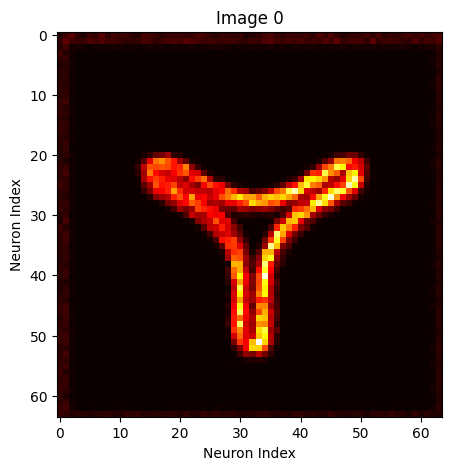

6.964113547586355
(64, 64)
[[2.05055293e-01 5.32212508e-01 8.45263009e-01 ... 4.13957791e-01
  5.59556175e-01 6.65073400e-01]
 [4.18087699e-01 8.80549931e-01 5.39647562e-01 ... 6.00678270e-01
  4.98938797e-01 7.58050278e-01]
 [3.13885313e-01 6.04189355e-01 1.29583726e-01 ... 1.36352331e-01
  1.97030189e-01 3.40064305e-01]
 ...
 [3.27572635e-01 4.88317755e-01 1.06099608e-01 ... 1.61744787e-15
  4.71695510e-02 2.73156208e-01]
 [4.63166737e-01 6.41451671e-01 1.24397465e-01 ... 6.64533678e-02
  1.29485316e-01 3.28046293e-01]
 [4.48362549e-01 4.04188994e-01 2.82383218e-01 ... 3.70074522e-01
  2.17940831e-01 2.47572052e-01]]


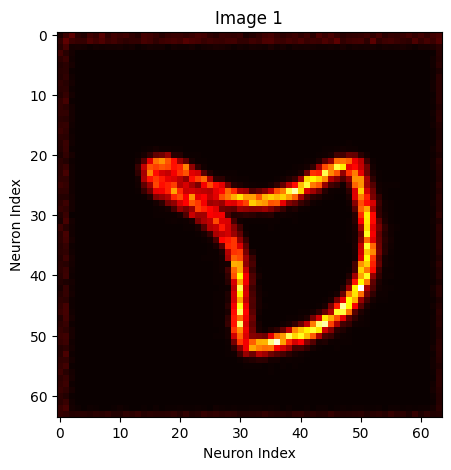

6.672441897405457
(64, 64)
[[1.50194429e-01 4.40821175e-01 7.89582743e-01 ... 4.08156665e-01
  5.37279289e-01 5.93877200e-01]
 [4.72407104e-01 6.86023170e-01 5.27146320e-01 ... 5.91873138e-01
  4.80188785e-01 6.65762953e-01]
 [2.14161559e-01 3.30774523e-01 9.27331568e-02 ... 1.32922193e-01
  1.86646644e-01 2.44860782e-01]
 ...
 [3.09854155e-01 2.17914505e-01 4.70799971e-02 ... 1.62192234e-15
  5.11843518e-02 1.97224277e-01]
 [3.70161628e-01 3.49154181e-01 6.38787847e-02 ... 6.63529830e-02
  1.21866815e-01 2.27708397e-01]
 [3.65625434e-01 3.11526322e-01 2.53347678e-01 ... 3.62810679e-01
  2.20169567e-01 2.51417149e-01]]


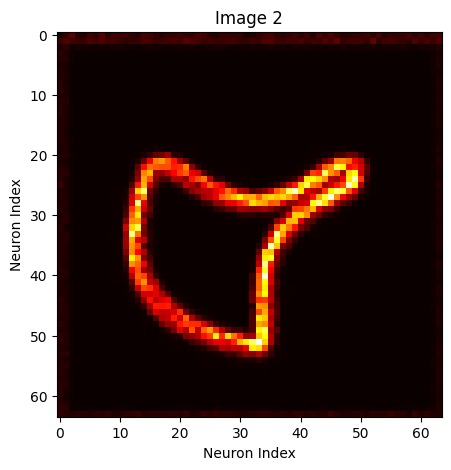

6.680201918384903
(64, 64)
[[1.67774934e-01 4.68558054e-01 7.98941735e-01 ... 4.04318544e-01
  5.39309527e-01 6.14137316e-01]
 [4.72970185e-01 7.35384524e-01 5.26520934e-01 ... 5.83060102e-01
  4.79297153e-01 6.91238004e-01]
 [2.52664228e-01 4.08107453e-01 1.01551202e-01 ... 1.31779948e-01
  1.94447084e-01 2.73064820e-01]
 ...
 [3.39226854e-01 2.89145053e-01 6.24769936e-02 ... 1.59759705e-15
  5.47704133e-02 2.29656350e-01]
 [4.14254554e-01 4.29379542e-01 7.89853412e-02 ... 6.55094691e-02
  1.27487654e-01 2.65299848e-01]
 [4.00386823e-01 3.34486856e-01 2.59515770e-01 ... 3.61311216e-01
  2.13794796e-01 2.47429776e-01]]


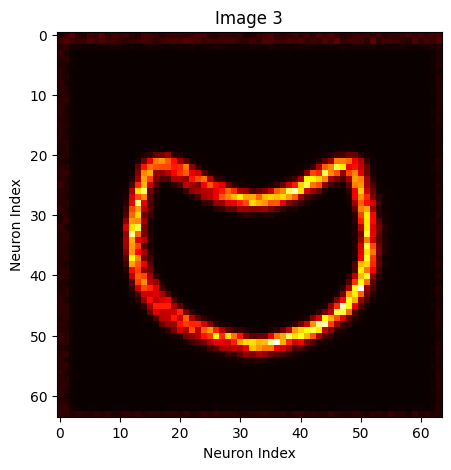

6.911920490620945
(64, 64)
[[2.02485860e-01 3.58153852e-01 7.52616677e-01 ... 4.20762181e-01
  5.03849238e-01 4.58508992e-01]
 [3.73829493e-01 6.33815002e-01 5.24766952e-01 ... 6.20884714e-01
  4.78105417e-01 5.68991426e-01]
 [7.48361990e-02 2.18103068e-01 1.11643610e-01 ... 1.39419867e-01
  1.17862857e-01 1.62888787e-01]
 ...
 [8.93239324e-02 8.82757731e-02 8.95310987e-03 ... 1.64226457e-15
  8.87653936e-03 4.61917293e-02]
 [1.25673086e-01 1.65972435e-01 2.22532493e-02 ... 6.76395789e-02
  6.76395789e-02 8.00056209e-02]
 [1.86415351e-01 2.69873806e-01 2.78999227e-01 ... 3.71295461e-01
  2.69861479e-01 3.49708991e-01]]


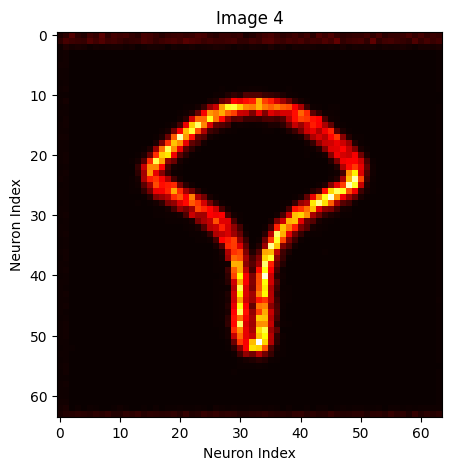

6.80690633131366
(64, 64)
[[1.54846292e-01 4.40648942e-01 8.02391373e-01 ... 4.15447154e-01
  5.54505188e-01 6.09892199e-01]
 [4.71049043e-01 7.07469991e-01 5.38546312e-01 ... 6.08900826e-01
  4.89485028e-01 6.84027583e-01]
 [2.23522220e-01 3.42871449e-01 1.00542860e-01 ... 1.37609922e-01
  1.91135777e-01 2.51653194e-01]
 ...
 [3.11974324e-01 2.17907763e-01 4.73949503e-02 ... 1.61499458e-15
  5.20845065e-02 1.97169979e-01]
 [3.69900159e-01 3.48564916e-01 6.37015936e-02 ... 6.66005836e-02
  1.21804248e-01 2.28903373e-01]
 [3.65288169e-01 3.11199764e-01 2.55616949e-01 ... 3.68858860e-01
  2.23053450e-01 2.50629612e-01]]


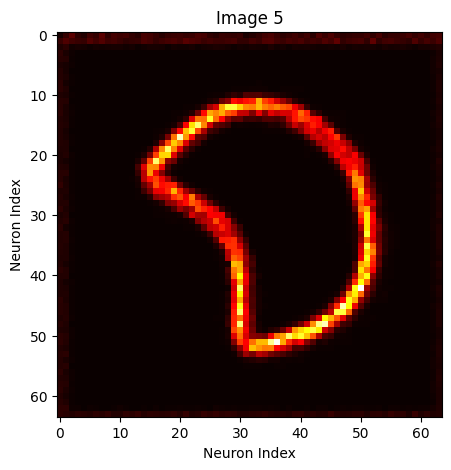

6.615256102686316
(64, 64)
[[2.14941469e-01 4.25277196e-01 7.90466622e-01 ... 4.08249408e-01
  5.10138512e-01 5.40120126e-01]
 [3.61662122e-01 7.03163701e-01 5.20863941e-01 ... 5.98813266e-01
  4.78683151e-01 6.14186682e-01]
 [1.74284370e-01 3.52427254e-01 1.01310857e-01 ... 1.34126219e-01
  1.32068073e-01 2.00990256e-01]
 ...
 [1.45196777e-01 2.34772993e-01 5.06356382e-02 ... 1.61013000e-15
  9.65221147e-03 1.00089649e-01]
 [2.33452003e-01 3.63049579e-01 6.88079488e-02 ... 6.60744524e-02
  8.54200178e-02 1.50099635e-01]
 [2.83699563e-01 2.96196315e-01 2.58638969e-01 ... 3.60673748e-01
  2.41934530e-01 2.61117723e-01]]


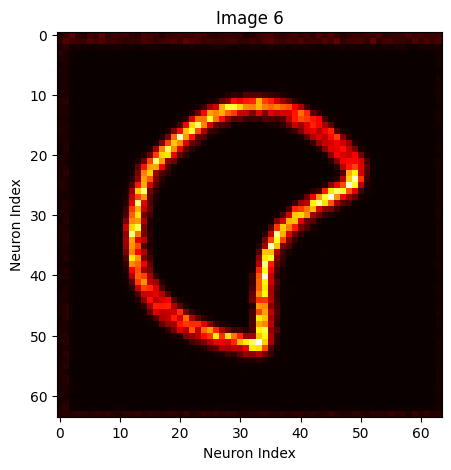

6.810516819518619
(64, 64)
[[2.97032517e-01 5.20608036e-01 8.43167782e-01 ... 4.02165304e-01
  5.30205045e-01 6.31336555e-01]
 [3.88031962e-01 8.99697822e-01 5.28051184e-01 ... 5.87219863e-01
  4.88118344e-01 7.26418532e-01]
 [3.42981487e-01 6.76487466e-01 1.40616037e-01 ... 1.32408740e-01
  1.66560371e-01 3.22903121e-01]
 ...
 [3.35140366e-01 5.41005786e-01 1.17250609e-01 ... 1.57945918e-15
  2.28835881e-02 2.31196894e-01]
 [4.53048501e-01 7.21091122e-01 1.36367455e-01 ... 6.47779903e-02
  1.09197356e-01 2.95491100e-01]
 [4.51798844e-01 4.20662453e-01 2.83183565e-01 ... 3.57416226e-01
  2.19255879e-01 2.38657834e-01]]


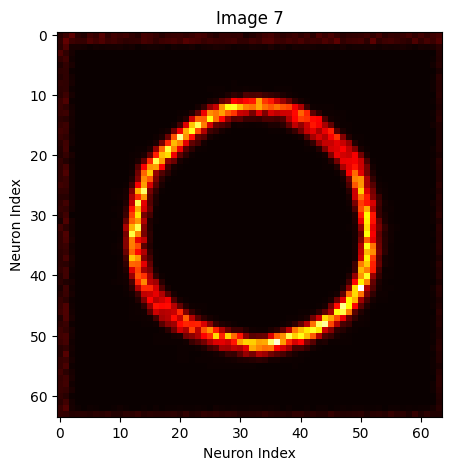

In [9]:
import orjson

def determine_inputs_per_image(data, _flat_poisson_inputs, beta=6, num_neurons=4096):
    # The shape of flat_poisson_inputs is num_images, num_poisson_neurons
    # Create directory if it doesn't exist
    output_dir = "data/random_stuff"
    os.makedirs(output_dir, exist_ok=True)
    num_images, num_poisson_neurons = _flat_poisson_inputs.shape
    print(f"num_images: {num_images}, num_poisson_neurons: {num_poisson_neurons}")
    collapsed_input_hz = _flat_poisson_inputs * beta * hertz
    # shape: num_images by (height x width x num_filters)
    i_indices = data["i_0"]
    print(len(i_indices))
    j_indices = data["j_0"]
    print(max(j_indices))
    j_activity = np.zeros((num_images, num_neurons)) * hertz
    for image in range(num_images):
        print(f"image: {image}")
        for i, j in zip(i_indices, j_indices):
            if collapsed_input_hz[image, i] > 0:
                j_activity[image, j] += collapsed_input_hz[image, i]
    print(j_activity[:, 0])
    return j_activity

with open("weights/initial_setup.json", "rb") as file:
    DATA = orjson.loads(file.read())

image_activity = determine_inputs_per_image(DATA, flat_poisson_inputs)
num_images = 8
for i in range(num_images):
    plt.figure(figsize=(5, 5))
    plt.title("Input Activity for Each Image")
    poisson_inputs_by_image = image_activity[i, :]
    grid = np.reshape(poisson_inputs_by_image, (64, 64)) / hertz
    print(max(grid.flatten()))
    # the shape of the grid is 64x64
    print(grid.shape)
    print(grid)
    plt.imshow(grid, cmap="hot", interpolation="nearest")
    plt.title(f"Image {i}")
    plt.xlabel("Neuron Index")
    plt.ylabel("Neuron Index")
    plt.show()


In [ ]:
with open("weights/initial_setup.json", "rb") as file:
    DATA = orjson.loads(file.read())
flat_poisson_inputs = gen_brian_inputs()
i_indices = DATA["i_0"]
j_indices = DATA["j_0"]
max_i = max(i_indices)
max_j = max(j_indices)
print(f"current max poisson index: {max(i_indices)}, hypothetical max: {128*128*8}")
print(f"current max neuron index: {max(j_indices)}, hypothetical max: {64*64}")

print(f"current max poisson index: {max(i_indices)}, half hypothetical max: {128*128*8}")
print(f"current max neuron index: {max(j_indices)}, half hypothetical max: {64*32}")

print(max_i - 8*64*64*4)
# 8 * 4 ish
print(max_j - 64*32)
# 32 * 3



In [ ]:
date = "20241127"  # Replace with the actual date
file_path = f"data/random_stuff/flat_poisson_inputs_{date}.pkl"

with open(file_path, 'rb') as file:
    flat_poisson_inputs = pickle.load(file)

print("File loaded successfully.")

Looks like it's half what it should be - then sparsity might be doing the rest, not entirely clear but a good guess

In [ ]:
_3d_poisson_rates = gen_brian_inputs()
print(_3d_poisson_rates.shape)

In [ ]:
print(flat_poisson_inputs.shape)
print(max(i_indices))

In [ ]:
from brian2 import *
import numpy as np
from network.create_network import generate_indices
# exc_neuron_layer_1 = NeuronGroup(
#     64 * 64,
#     model="dv/dt= 0 - v: 1",
#     threshold="v>v_threshold",
#     reset="v=v_reset",
#     refractory=2 * ms,
#     method="euler",
# )
num_images, num_filtered_pixels = flat_poisson_inputs.shape
num_neurons = 64*64
# poisson_neurons = PoissonGroup(
#     num_filtered_pixels,
#     rates=flat_poisson_inputs[0] * hertz,
#     name="p0"
# )
num_filters = 8
radius = 5  # Example radius value
indices = generate_indices(8, 128,128, 8, num_neurons, 2, 50)
print(len(indices))



In [ ]:
toy_indices = indices
connection_prob = 0.5
for j, index_list in enumerate(toy_indices):
    toy_indices[j] = [
        index for index in index_list if np.random.rand() < connection_prob
    ]
for index_list in toy_indices:
    print(index_list)
    print(len(index_list))


In [ ]:
toy_indices = indices
connection_prob = 0.5
print(np.random.rand())
for j, index_list in enumerate(toy_indices):
    toy_indices[j] = [
        index for index in index_list if np.random.rand() < connection_prob
    ]
# connection_prob = 0.5
# toy_indices = [index for index in toy_indices if np.random.rand() < connection_prob]
print(len(toy_indices))
print(11111)
for index_list in toy_indices:
    print(len(index_list))

In [ ]:
num_neurons = 64*64
indices = [[] for _ in range(num_neurons)]
print(len(indices))

In [ ]:
def generate_indices(
        num_images,
        length_image,
        num_filters,
        num_neurons,
        radius,
        avg_no_neurons):
    indices = [[] for _ in range(num_neurons)]
    print(len(indices))
    length_neurons = int(sqrt(num_neurons))
    print(length_neurons)
    for j in range(num_neurons):
        post_h = j// length_neurons
        post_w = j % length_neurons
        scale = length_image / length_neurons
        print(scale)
        print(f"post_h: {post_h}, post_w: {post_w}")
        h = int(post_h * scale)
        w = int(post_w * scale)
        print(f"h: {h}, w: {w}")
        indices[j] = grab_indices_within_radius(h,w, length_image, num_filters, radius)
    return indices

def grab_indices_within_radius(
        h,
        w,
        length_image,
        num_filters,
        radius):
    indices = []
    for x in range(length_image):
        for y in range(length_image):
            if (x-h)**2 + (y-w)**2 <= radius**2:
                for z in range(num_filters):
                    indices.append(x*length_image*num_filters + y*num_filters + z)
    return indices
indices = generate_indices(8, 128, 8, 64*64, 2, 50)


In [77]:
# Get the same input - can use the timed array to get the same input or the 3d poisson rates or whatever we can load in
# Get the same poisson group - just a question of size
# connect the 
from brian2 import *
import numpy as np
network2 = Network()
stimulus_exposure_time = 100 * ms
beta = 6
print("making timed inputs")
timed_input = generate_timed_array_from_flat_poisson_inputs(
    flat_poisson_inputs, beta=6, stimulus_exposure_time=stimulus_exposure_time
)
print("started")

num_images, num_filtered_pixels = flat_poisson_inputs.shape
num_neurons = 64*64
print("making poisson group")
poisson_neurons = PoissonGroup(
    num_filtered_pixels,
    rates="timed_input(t, i)",
    name="p0"
)
num_filters = 8
radius = 5  # Example radius value

print("getting data")
with open("weights/initial_setup.json", "rb") as file:
    DATA = orjson.loads(file.read())

i_indices = DATA["i_0"]
j_indices = DATA["j_0"]

print("making counter")
spike_counter = NeuronGroup(N = num_neurons, model = "dv/dt= 0*Hz: 1")
print("making synapses")
synapses = Synapses(
    poisson_neurons,
    spike_counter,
    "w : 1",
    on_pre="v += w",
    method="euler",
    name="synapses",
)
print("connecting")
synapses.connect(i=i_indices, j=j_indices)
synapses.w = 1
print("making monitor")
voltage_monitor = StateMonitor(source=spike_counter, dt=stimulus_exposure_time, record=True, variables="v")
print("adding")
network2.add(poisson_neurons)
network2.add(spike_counter)
network2.add(synapses)
network2.add(voltage_monitor)
print("running")
network2.run(duration=805*ms, report="text")
print("done")
recorded_times = voltage_monitor.t
cumulative_activity = voltage_monitor.v
period_activity = np.zeros((num_neurons, len(recorded_times)))
for i in range(num_neurons):
    for j in range(len(recorded_times)):
        period_activity[i,j] = cumulative_activity[i,j] - cumulative_activity[i,j-1] if j > 0 else cumulative_activity[i,j]




making timed inputs
started
making poisson group
getting data
making counter
making synapses
connecting
making monitor
adding
running


INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.00s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 0.8 s
0.8 s (100%) simulated in 6s
done


In [80]:
print(timed_input(0*second,7))
print(cumulative_activity[:,7])

5.11795145 mHz
[0. 0. 0. ... 1. 1. 1.]


IndexError: index 8 is out of bounds for axis 1 with size 8

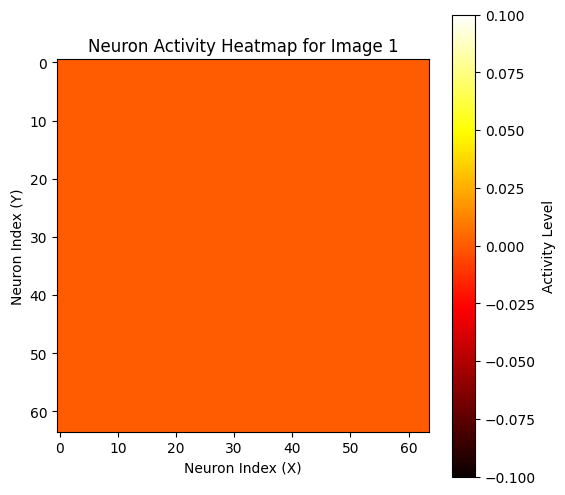

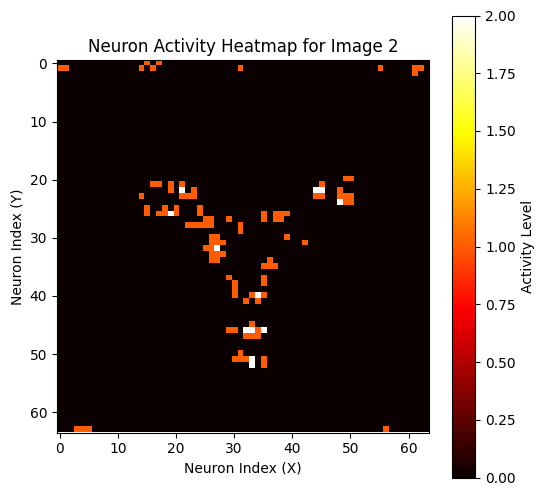

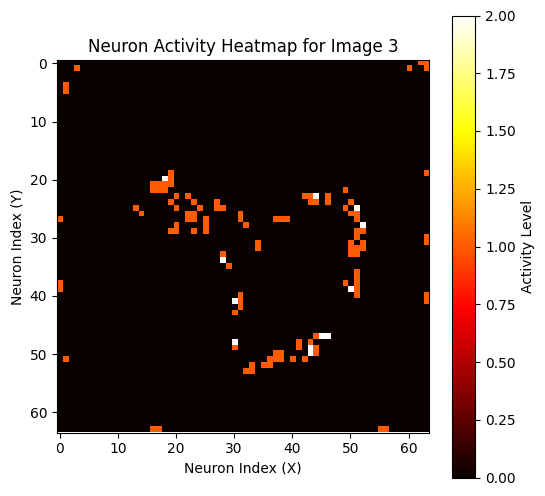

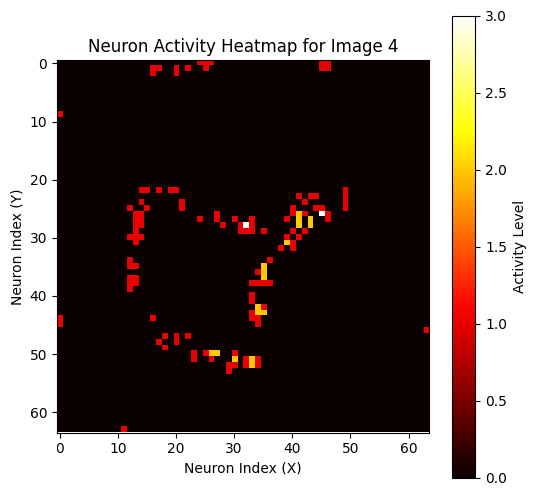

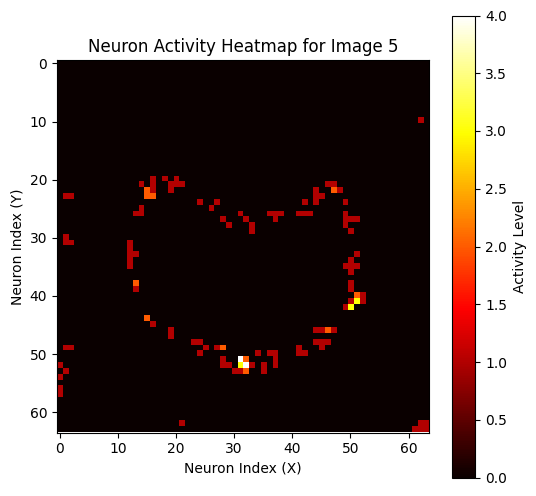

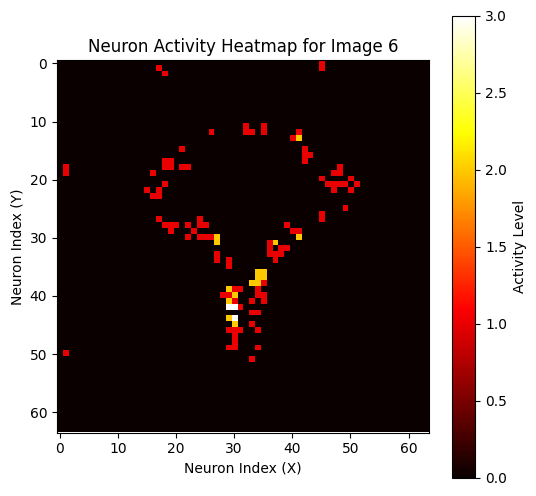

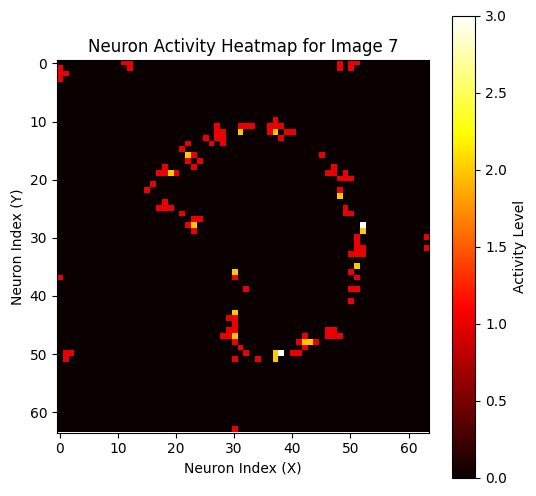

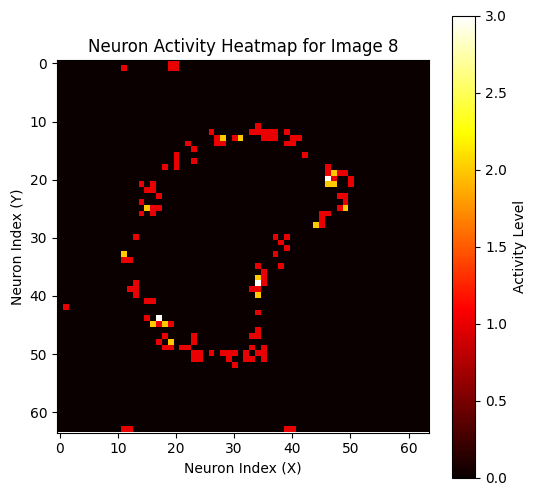

In [81]:
# THIS IS THE AMOUNT OF TIMES THAT THE NEURONS RECEIVED SPIKES
import numpy as np

import matplotlib.pyplot as plt

# Number of images
num_images = period_activity.shape[1]

# Iterate over each image and create a heatmap
for i in range(num_images):
    plt.figure(figsize=(6, 6))
    plt.title(f"Neuron Activity Heatmap for Image {i+1}")
    
    # Reshape period_activity for the current image into a 64x64 grid
    activity_grid = period_activity[:, i].reshape(64, 64)
    
    # Create the heatmap
    plt.imshow(activity_grid, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Activity Level')
    plt.xlabel("Neuron Index (X)")
    plt.ylabel("Neuron Index (Y)")
    plt.show()